Data Loading

In [986]:
import pandas as pd
import numpy as np

regulars = pd.read_csv('regular_price.csv')
promos = pd.read_csv('promo_price.csv')
sales = pd.read_csv('sales.csv')

In [987]:
regulars.describe()


,regular_price
count,12118.000000
mean,175.369533
std,130.067835
min,18.500000
25%,25.600000
50%,259.700000
75%,300.500000
max,330.400000


In [988]:
promos.describe()


,promo_price
count,253.000000
mean,186.529249
std,114.566089
min,15.500000
25%,20.500000
50%,252.600000
75%,264.300000
max,296.000000


In [989]:
sales.describe()


,sales
count,12118.000000
mean,3.146064
std,4.598293
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,68.000000


In [990]:
#Merge all data into one df
merged = sales.merge(regulars, on=['daydt', 'item_id', 'store_id'], how='left')
merged = merged.merge(promos, on=['daydt', 'item_id', 'store_id'], how='left')
merged


,daydt,item_id,store_id,sales,regular_price,promo_price
0,2022-05-01,item7,store2,0,35.2,NaN
1,2021-09-25,item7,store2,0,35.2,NaN
2,2021-09-26,item7,store2,0,35.2,NaN
3,2021-09-27,item7,store2,0,35.2,NaN
4,2021-09-28,item7,store2,0,35.2,NaN
...,...,...,...,...,...,...
12113,2019-01-05,item4,store2,5,24.0,NaN
12114,2019-01-06,item4,store2,5,24.0,NaN
12115,2019-01-07,item4,store2,5,24.0,NaN
12116,2019-01-08,item4,store2,6,24.0,NaN


In the following plot we can see that not all items are being sold in all stores

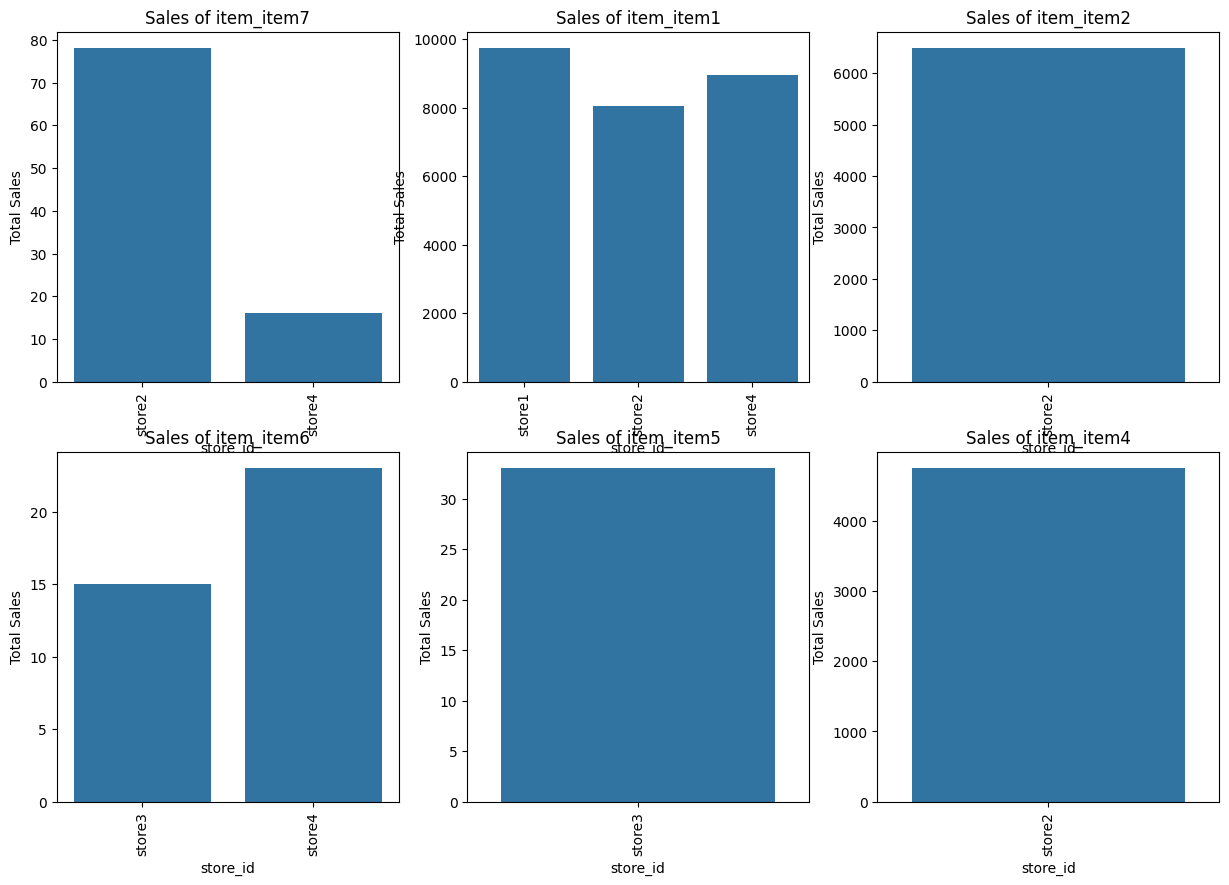

In [991]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_items = merged['item_id'].unique()
num_items = len(unique_items)
rows = 2
cols = 3

#Plot to represent sales of different items in all stores
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  

for i, item in enumerate(unique_items):
    item_data = merged[merged['item_id'] == item]
    store_sales = item_data.groupby('store_id')['sales'].sum().reset_index()
    
    sns.barplot(data=store_sales, x='store_id', y='sales', ax=axes[i])
    axes[i].set_title(f"Sales of item_{item}")
    axes[i].set_xlabel("store_id")
    axes[i].set_ylabel("Total Sales")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()


The following plot represents total sales of each item. We can see clearly that item1 has the most sales

/var/folders/m2/5rkdwqms0xqd7xv8lvx1kwxh0000gn/T/ipykernel_5682/2173823077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_sales, x='item_id', y='sales', palette="viridis")


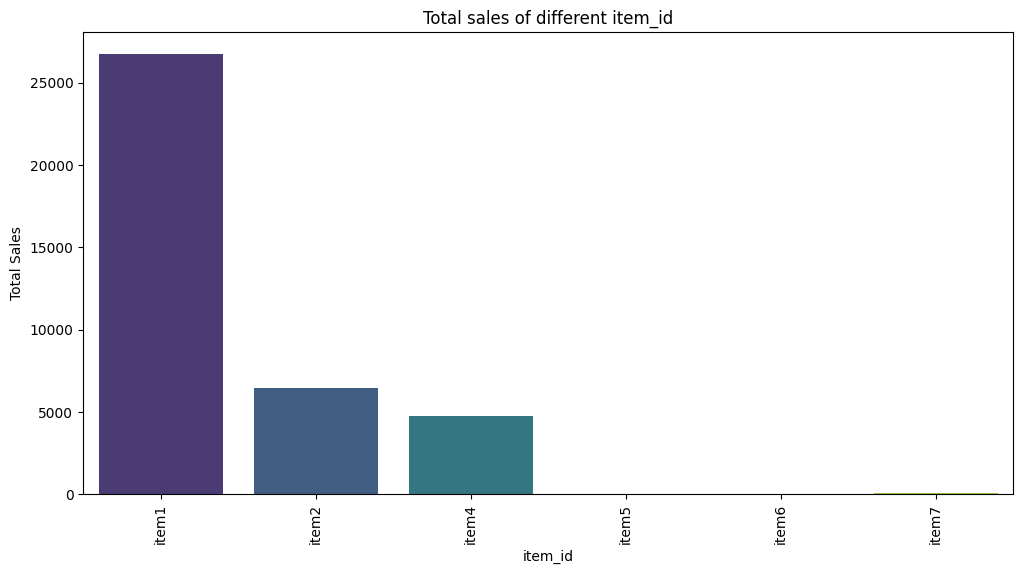

In [992]:
import matplotlib.pyplot as plt
import seaborn as sns

#get total sales per item
item_sales = merged.groupby('item_id')['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=item_sales, x='item_id', y='sales', palette="viridis")
plt.title("Total sales of different item_id")
plt.xlabel("item_id")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


In the following Heatmap plot you can see the number of sales for different items in different stores 

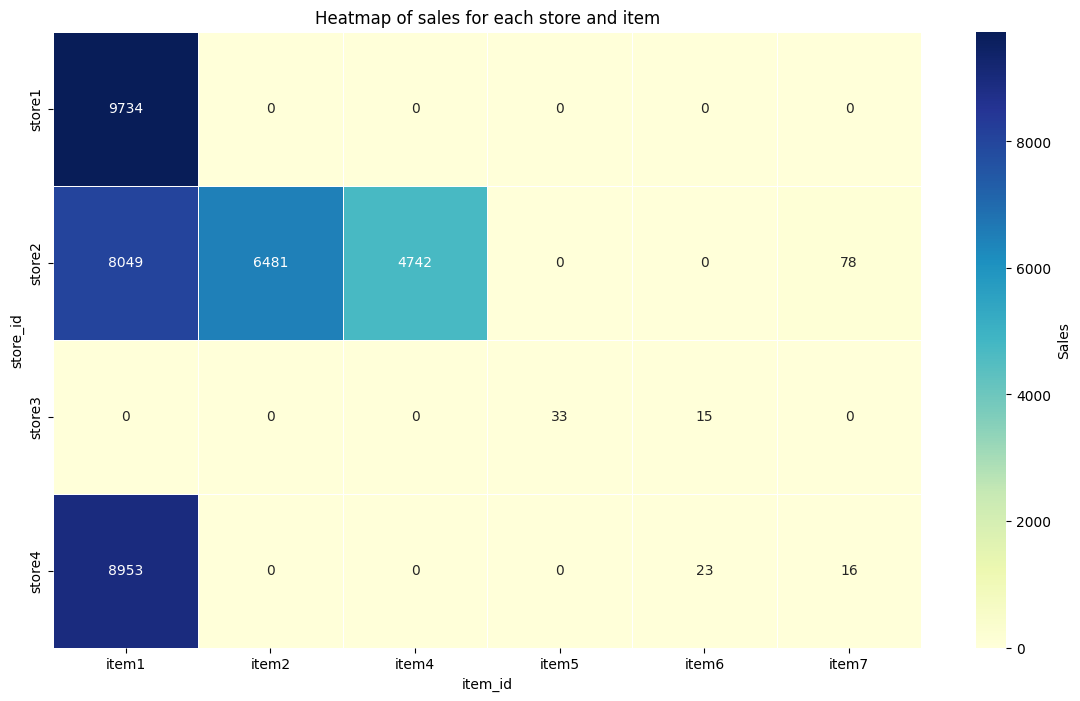

In [993]:
store_item_sales = merged.pivot_table(values='sales', index='store_id', columns='item_id', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(store_item_sales, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Sales'})
plt.title("Heatmap of sales for each store and item")
plt.xlabel("item_id")
plt.ylabel("store_id")
plt.show()


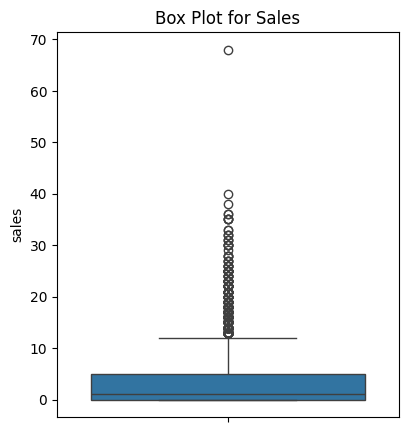

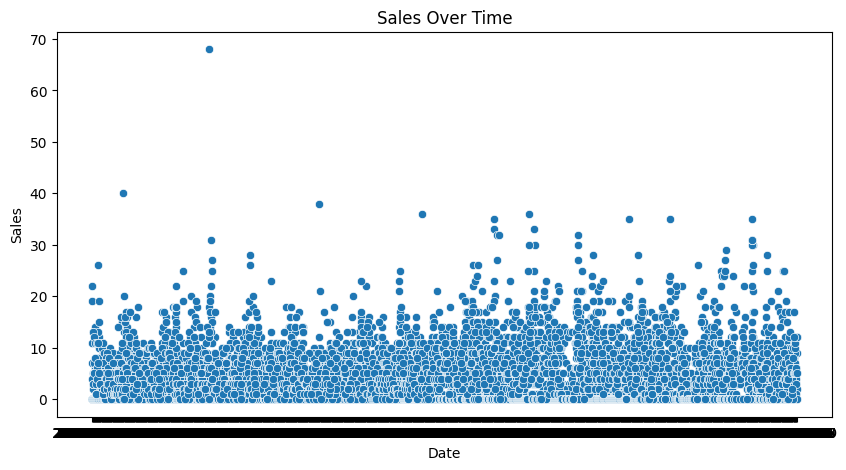

In [994]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

#Boxplot for Sales
plt.subplot(1, 3, 1)
sns.boxplot(y=merged['sales'])
plt.title("Box Plot for Sales")


#Scatter Plot for Sales over Time 
plt.figure(figsize=(10, 5))
if 'daydt' in merged.columns:
    sns.scatterplot(x='daydt', y='sales', data=merged)
    plt.title("Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.show()


Find and drop the row with 68 sale (outlier)

In [995]:
max_sales_index = merged['sales'].idxmax()
merged = merged.drop(max_sales_index)

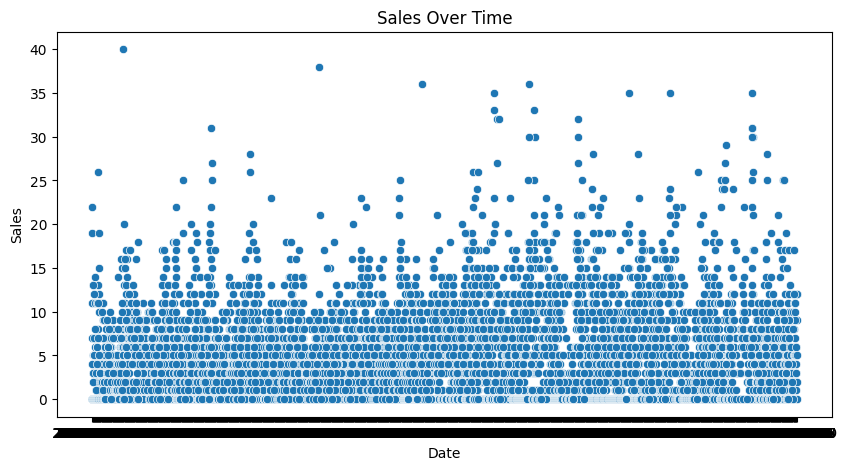

In [996]:
plt.figure(figsize=(10, 5))
if 'daydt' in merged.columns:
    sns.scatterplot(x='daydt', y='sales', data=merged)
    plt.title("Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.show()

Preprocessing and feature engineering

In [997]:
#merged['day_of_week'] = pd.to_datetime(merged['daydt']).dt.dayofweek  #Extract day of the week from daydt
merged['month'] = pd.to_datetime(merged['daydt']).dt.month #The same way extract the month
merged['year'] = pd.to_datetime(merged['daydt']).dt.year #The same way extract the year
#merged['is_weekend'] = merged['day_of_week'].isin([5, 6]).astype(int)  #1 if its weekend, 0 if weekday
#Replace string values of store/item_id to integers
merged['store_id'] = merged['store_id'].str.replace('store', '').astype(int)
merged['item_id'] = merged['item_id'].str.replace('item', '').astype(int)
merged

,daydt,item_id,store_id,sales,regular_price,promo_price,month,year
0,2022-05-01,7,2,0,35.2,NaN,5,2022
1,2021-09-25,7,2,0,35.2,NaN,9,2021
2,2021-09-26,7,2,0,35.2,NaN,9,2021
3,2021-09-27,7,2,0,35.2,NaN,9,2021
4,2021-09-28,7,2,0,35.2,NaN,9,2021
...,...,...,...,...,...,...,...,...
12113,2019-01-05,4,2,5,24.0,NaN,1,2019
12114,2019-01-06,4,2,5,24.0,NaN,1,2019
12115,2019-01-07,4,2,5,24.0,NaN,1,2019
12116,2019-01-08,4,2,6,24.0,NaN,1,2019


In [998]:
#Replace NaN values with the regular prices and add a flag 'has_promo' with value 0 or 1
merged['has_promo'] = merged['promo_price'].notna().astype(int)
#merged['promo_price'].fillna(merged['regular_price'], inplace=True)  
merged

,daydt,item_id,store_id,sales,regular_price,promo_price,month,year,has_promo
0,2022-05-01,7,2,0,35.2,NaN,5,2022,0
1,2021-09-25,7,2,0,35.2,NaN,9,2021,0
2,2021-09-26,7,2,0,35.2,NaN,9,2021,0
3,2021-09-27,7,2,0,35.2,NaN,9,2021,0
4,2021-09-28,7,2,0,35.2,NaN,9,2021,0
...,...,...,...,...,...,...,...,...,...
12113,2019-01-05,4,2,5,24.0,NaN,1,2019,0
12114,2019-01-06,4,2,5,24.0,NaN,1,2019,0
12115,2019-01-07,4,2,5,24.0,NaN,1,2019,0
12116,2019-01-08,4,2,6,24.0,NaN,1,2019,0


In [999]:
merged['discount'] = merged['regular_price'] - merged['promo_price']
#merged['discount'] = merged['discount'].where(merged['regular_price'].notna() & merged['promo_price'].notna()) 
merged

,daydt,item_id,store_id,sales,regular_price,promo_price,month,year,has_promo,discount
0,2022-05-01,7,2,0,35.2,NaN,5,2022,0,NaN
1,2021-09-25,7,2,0,35.2,NaN,9,2021,0,NaN
2,2021-09-26,7,2,0,35.2,NaN,9,2021,0,NaN
3,2021-09-27,7,2,0,35.2,NaN,9,2021,0,NaN
4,2021-09-28,7,2,0,35.2,NaN,9,2021,0,NaN
...,...,...,...,...,...,...,...,...,...,...
12113,2019-01-05,4,2,5,24.0,NaN,1,2019,0,NaN
12114,2019-01-06,4,2,5,24.0,NaN,1,2019,0,NaN
12115,2019-01-07,4,2,5,24.0,NaN,1,2019,0,NaN
12116,2019-01-08,4,2,6,24.0,NaN,1,2019,0,NaN


In [1000]:
#Sort by date in order to split the data for train/test (latest for test)
merged = merged.sort_values('daydt')
#merged = merged.drop('daydt', axis=1) #drop daydt
merged

,daydt,item_id,store_id,sales,regular_price,promo_price,month,year,has_promo,discount
1992,2019-01-02,1,2,12,25.2,NaN,1,2019,0,NaN
10769,2019-01-02,4,2,9,24.0,NaN,1,2019,0,NaN
3340,2019-01-02,2,2,3,97.3,NaN,1,2019,0,NaN
4678,2019-01-02,1,4,8,285.0,NaN,1,2019,0,NaN
650,2019-01-02,1,1,9,285.0,NaN,1,2019,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1353,2022-09-11,1,1,1,300.5,NaN,9,2022,0,NaN
123,2022-09-11,7,2,0,35.2,NaN,9,2022,0,NaN
2694,2022-09-11,1,2,5,25.6,NaN,9,2022,0,NaN
8147,2022-09-11,5,3,0,21.2,NaN,9,2022,0,NaN


Selection of models, training, prediction and evaluation

In [1001]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

seed = 2 #set a seed for reproducibility
train_data = merged[merged['daydt'] <= '2022-08-15'] #get all data until 15/8 for train
test_data = merged[(merged['daydt'] >= '2022-08-15')] #rest for test

X_train, y_train = train_data.drop(['sales', 'daydt'], axis=1), train_data['sales']
X_test, y_test = test_data.drop(['sales', 'daydt'], axis=1), test_data['sales']
X_test



,item_id,store_id,regular_price,promo_price,month,year,has_promo,discount
5976,1,4,314.8,NaN,8,2022,0,NaN
7475,5,3,20.9,NaN,8,2022,0,NaN
4630,2,2,97.3,NaN,8,2022,0,NaN
7327,6,3,330.4,NaN,8,2022,0,NaN
1944,1,1,314.8,NaN,8,2022,0,NaN
...,...,...,...,...,...,...,...,...
1353,1,1,300.5,NaN,9,2022,0,NaN
123,7,2,35.2,NaN,9,2022,0,NaN
2694,1,2,25.6,NaN,9,2022,0,NaN
8147,5,3,21.2,NaN,9,2022,0,NaN


In [1002]:
model = RandomForestRegressor(n_jobs=-1, random_state=seed)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21168446883064862

In [1003]:
import math

y_pred = model.predict(X_test) 
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

1.8175601001786768


In [ ]:
import csv

with open('forecast_predictions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["date", "item", "store", "prediction"])

In [ ]:
def my_predict(item_id, store_id, regular_price, promo_price, date, has_promo, discount):
    
    month = date.month
    year = date.year
    
    new_input = pd.DataFrame({
        'item_id': [item_id],
        'store_id': [store_id],
        'regular_price': [regular_price],  
        'promo_price': [promo_price],     
        'month': [month],
        'year': [year],
        'has_promo': [has_promo],  
        'discount': [discount]
    })
    predicted_sales = model.predict(new_input)
    #print(f"Predicted sales for item{item_id} at store{store_id} on {date.strftime("%Y-%m-%d")}: {round(predicted_sales[0],2)}")
    
    with open('forecast_predictions.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([date.strftime("%Y-%m-%d").replace("-",""), f"item{item_id}", f"store{store_id}", np.round(predicted_sales, 2)[0]])




In [1006]:
from datetime import datetime, timedelta

#dates for predictions
start_date = datetime(2022, 9, 12)
end_date = datetime(2022, 9, 18)
current_date = start_date

while current_date <= end_date:
    for item_index in range(1,8): #to loop over 7 different items in dataset
        for store_index in range(1,5):
            latest_date_row = merged[(merged['item_id'] == item_index) & (merged['store_id'] == store_index) & (merged['regular_price'].notna())].tail(1)
            if not latest_date_row.empty:
                #print(latest_date_row['regular_price'])
                my_predict(item_index,store_index,latest_date_row['regular_price'],float('nan'),current_date,0,0) 
            else:
                #print(f"Item{item_index} wasnt found in Store{store_index}. Skipping prediction..")
                pass
    current_date += timedelta(days=1)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python